# Python 실습 2 (2023.09.27)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference

[Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Rank-r Approximation of an image

We will decompose a matrix $X$ using SVD and then reconstructs and visualizes approximate versions of $X$ using different rank values.

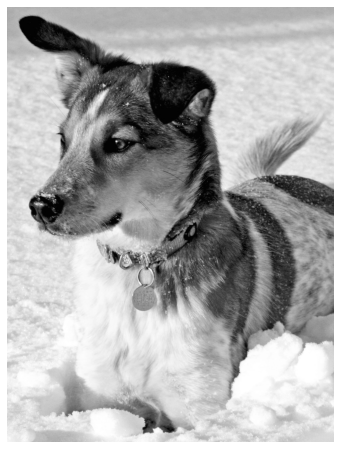

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

from urllib.request import urlretrieve

urlretrieve('https://github.com/jooyongsim/numerical2023/blob/main/src/dog.jpg?raw=true','dog.jpg')

A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Let's perform Singular Value Decomposition on a matrix $X$ using NumPy's linalg.svd() method. The matrix $X$ is decomposed into three matrices: $U$, $S$, and $V^T$. The full_matrices=False argument ensures that the shapes of $U$, $S$, and $V^T$ are aligned for the multiplication operations that follow (i.e., producing a reduced rank approximation of $X$). After the decomposition, $S$ is a 1-dimensional array containing the singular values. The line S = np.diag(S) transforms this array into a diagonal matrix.

- Skinny tall matrix
<img src="https://github.com/jooyongsim/numerical2023/blob/main/photos/truncated_svd.PNG?raw=true" width = 400 height=200>
<!-- ![](https://github.com/jooyongsim/numerical2023/blob/main/photos/truncated_svd.PNG?raw=true) -->

- Short fat matrix
<img src="https://github.com/jooyongsim/numerical2023/blob/main/photos/truncated_svd_fat.PNG?raw=true" width = 500 height=300>

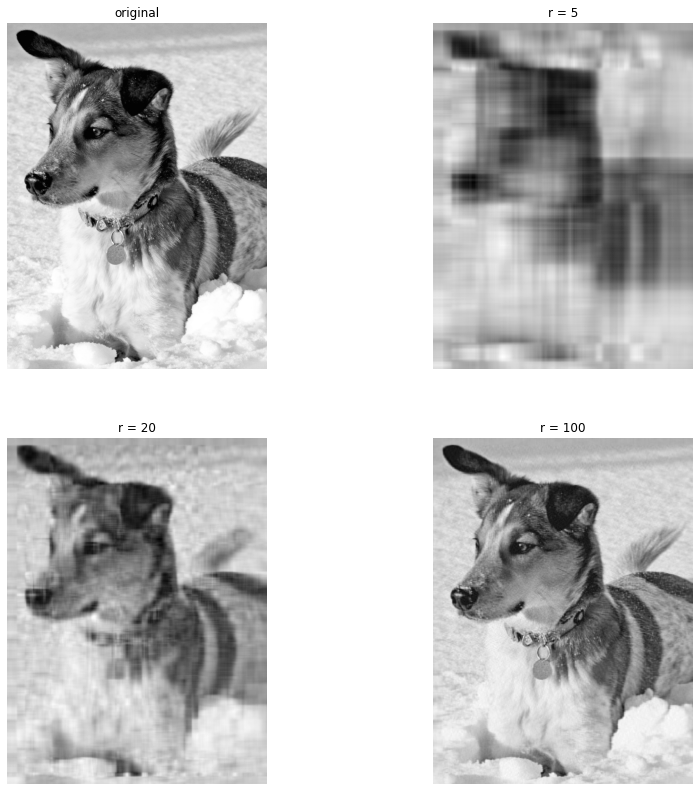

In [21]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

plt.figure(figsize=(14,14)); j = 0;
plt.subplot(2,2,(j+1)); j += 1
img = plt.imshow(X)
img.set_cmap('gray'); plt.axis('off')
plt.title('original')
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.subplot(2,2,(j+1)); j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray'); plt.axis('off')
    plt.title('r = ' + str(r))
plt.show()

## Cumulative square root of energy or variance

- The variance in the direction of the k-thprincipal component is given by the corresponding singular value $\sigma_k^2$.

- Fraction of total variance explained from $j$ to $k$ =
$\frac{\displaystyle\sum_{i=1}^{k} \sigma_i^2}{\displaystyle\sum_{i=1}^{n} \sigma_i^2}$

- Singular values can be used to estimate how many components to keep.

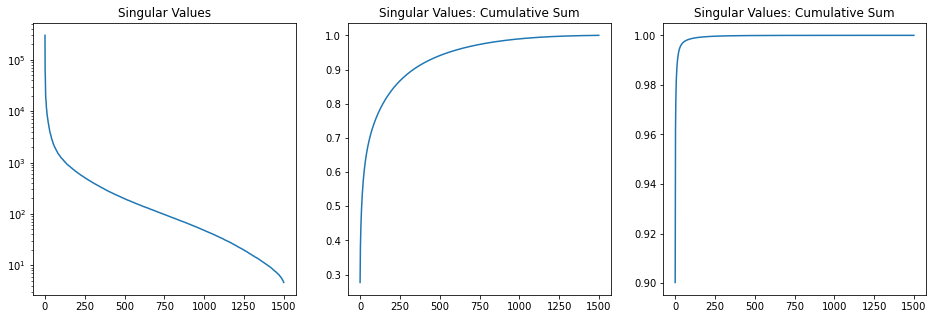

In [28]:
## f_ch01_ex02_2

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.subplot(132)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.subplot(133)
plt.plot(np.cumsum(np.diag(S)**2)/np.sum(np.diag(S)**2))
plt.title('Fraction of Total Variance Explained')
plt.show()

The first plot visualizes the singular values (which represent the square root of the energy for each mode) on a logarithmic scale. While it doesn't directly display the energy, larger singular values indicate modes that capture more energy or variance from the original data.

The second plot calculates the cumulative sum of the singular values, which corresponds to the cumulative square root of the energy. 

The third plot calculates the cumulative sum of the squared singular values, which corresponds to the cumulative variance explapined. 


## Cancer Patient Gene Data


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

from urllib.request import urlretrieve
urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_obs.csv','ovariancancer_obs.csv')
urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_grp.csv','ovariancancer_grp.csv')

obs = np.loadtxt('ovariancancer_obs.csv',delimiter=',')

f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
grp = grp[:-1]
print('number of patient:', len(grp))

obs_mean = obs - obs.mean(0)
obs_mean.shape

number of patient: 216


(216, 4000)

In [2]:
f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
grp = np.array(grp)[:-1]

In [3]:
obs.shape, grp.shape

((216, 4000), (216,))

In [4]:
U, S, VT = np.linalg.svd(obs_mean,full_matrices=False)
U.shape, S.shape, VT.shape, obs_mean.shape

((216, 216), (216,), (216, 4000), (216, 4000))

In [5]:
Z = obs_mean@VT.transpose()
classes = np.unique(grp)
Z.shape, classes

((216, 216), array(['Cancer', 'Normal'], dtype='<U6'))

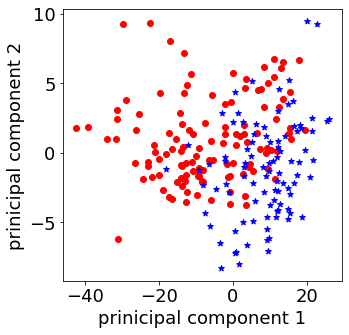

In [6]:
i_pat = np.array(grp) == classes[0]
i_normal = np.array(grp) == classes[1]

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot()
ax.scatter(Z[i_pat,0],Z[i_pat,1],marker='o',color='r')
ax.scatter(Z[i_normal,0],Z[i_normal,1],marker='*',color='b')
ax.set_xlabel('prinicipal component 1')
ax.set_ylabel('prinicipal component 2')
plt.show()

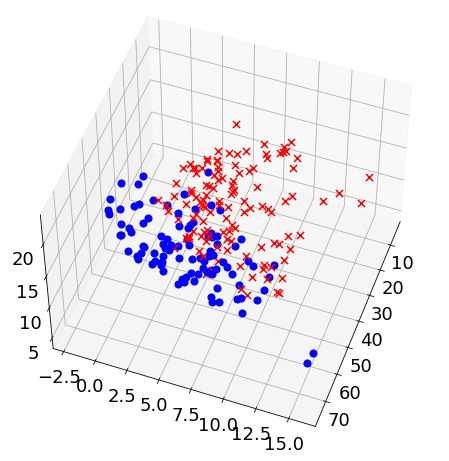

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for j in range(obs.shape[0]):
    x = np.dot(obs[j,:],VT[0,:])
    y = np.dot(obs[j,:],VT[1,:])
    z = np.dot(obs[j,:],VT[2,:])
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r', s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b', s=50)

ax.view_init(50,20)
plt.show()

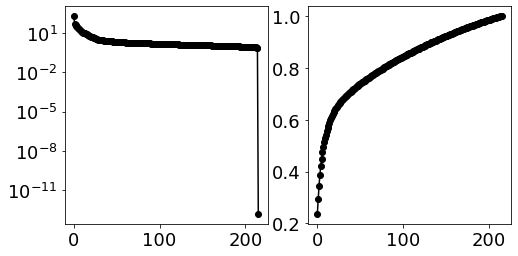

In [13]:
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

In [15]:
S[:10], (np.cumsum(S)/np.sum(S))[:10]

(array([205.15639733,  49.97721266,  43.84526892,  36.56769012,
         29.52981897,  25.35520858,  22.52925081,  16.73405702,
         14.74548535,  13.3633701 ]),
 array([0.2365448 , 0.2941684 , 0.34472188, 0.38688434, 0.42093214,
        0.45016663, 0.4761428 , 0.49543713, 0.51243864, 0.52784657]))

In [17]:
S[:10], (np.cumsum(S)/np.sum(S))[:10]

(array([829.27989531, 103.02489066,  49.37686386,  39.24745312,
         31.96080678,  27.34686765,  23.7795857 ,  20.022309  ,
         16.6298722 ,  14.74546771]),
 array([0.52608279, 0.59144025, 0.62276419, 0.64766219, 0.66793765,
        0.68528609, 0.70037151, 0.71307336, 0.7236231 , 0.73297741]))

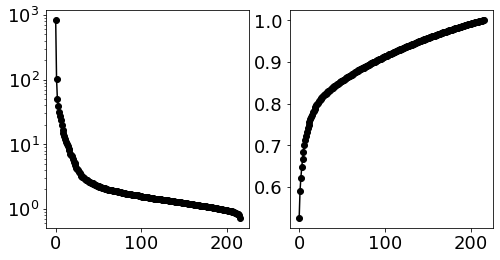

In [18]:
U, S, VT = np.linalg.svd(obs,full_matrices=False)

fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

## Eigen Faces

<img src="https://github.com/jooyongsim/numerical2023/blob/main/photos/eigen_faces.PNG?raw=true" width = 500 height=300>


- Each face is reshaped to a column vector with 192 x 168 = 32,256 elements

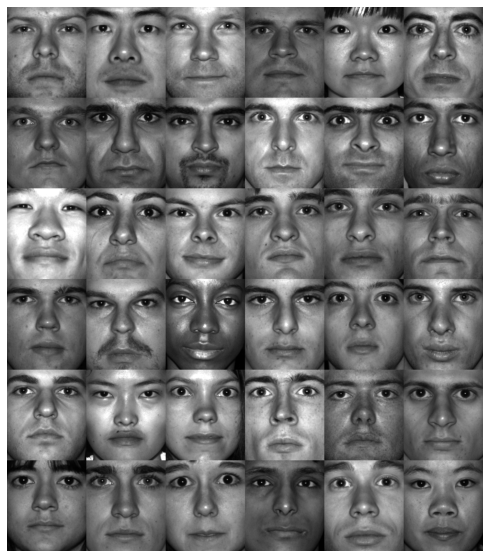

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

from urllib.request import urlretrieve
urlretrieve('https://jooyongsim.github.io/numerical2023/src/allFaces.mat','allFaces.mat')

mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

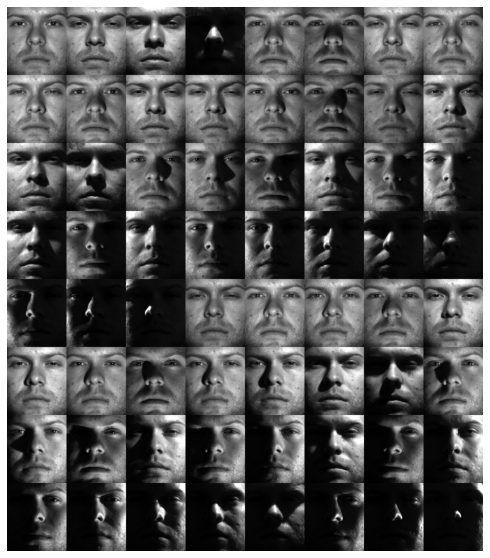

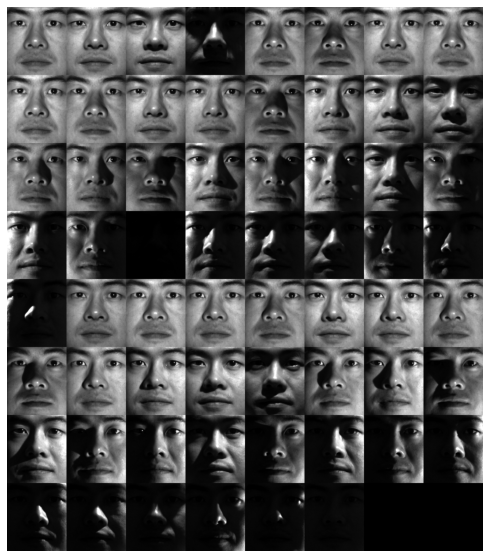

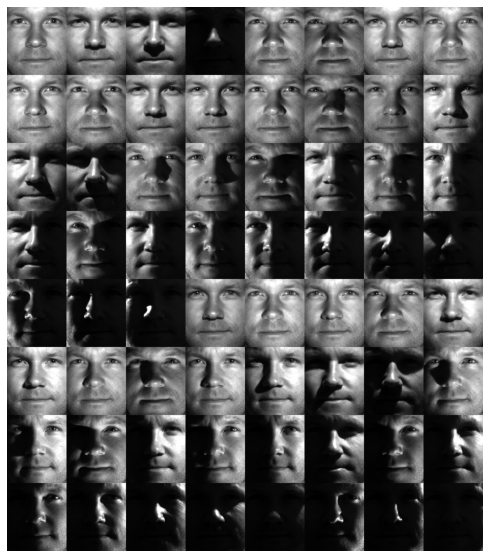

In [24]:
for person in range(3): # range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    count = 0
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
                
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])].T
avgFace = np.mean(trainingFaces,axis=0) # size n*m by 1

avgFace.shape

(32256,)

In [31]:
trainingFaces.shape

(2282, 32256)

In [27]:
# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[0],1))
U, S, VT = np.linalg.svd(X,full_matrices=False)
.shape, S.shape, VT.shape, X.shape

((2282, 2282), (2282,), (2282, 32256), (2282, 32256))

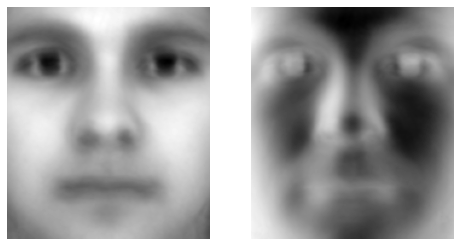

In [28]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(VT[0,:],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

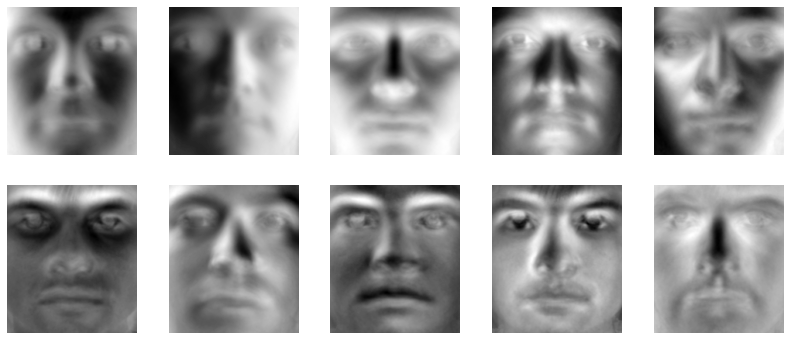

In [29]:
fig1 = plt.figure(figsize=[14,6])
for i in range(10):
    ax1 = fig1.add_subplot(2,5,i+1)
    img_u1 = ax1.imshow(np.reshape(VT[i,:],(m,n)).T)
    img_u1.set_cmap('gray')
    plt.axis('off')
plt.show()

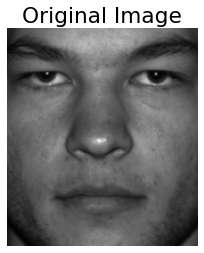

In [30]:
## Now show eigenface reconstruction of image that was omitted from test set
plt.rcParams['figure.figsize'] = [4, 4]
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37

plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [32]:
testFaceMS = testFace - avgFace
VT.shape, testFaceMS.shape, testFace.shape, testFaceMS.shape

((2282, 32256), (32256,), (32256,), (32256,))

In [33]:
testFaceMS @ VT[:3,:].T

array([-3621.72729102,  -463.87197373, -1249.92572525])

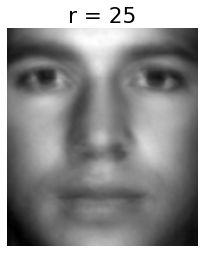

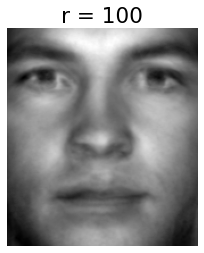

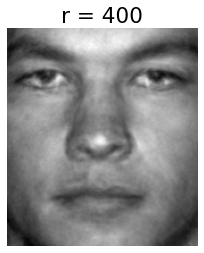

In [35]:
testFaceMS = testFace - avgFace
r_list = [25, 100, 400]

plt.rcParams['figure.figsize'] = [4, 4]

for r in r_list:
    Z_r = testFaceMS @ VT[:r,:].T # r principal components (# = r)
    reconFace = avgFace + Z_r @ VT[:r,:] # reconstruction using r eigen faces and r principal components
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

## Project person 2 and 7 onto PC5 and PC6


In [47]:
pca_mode1, pca_mode2 = (5,6)
# Project onto PCA modes 5 and 6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = trainingFaces[np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num]),:]
P2 = trainingFaces[np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num]),:]

P1 = P1 - np.tile(avgFace,(P1.shape[0],1))
P2 = P2 - np.tile(avgFace,(P2.shape[0],1))

PCs_P1 = P1 @ VT.T
PCs_P2 = P2 @ VT.T

P1.shape, PCs_P1.shape, VT.T.shape

((62, 32256), (62, 2282), (32256, 2282))

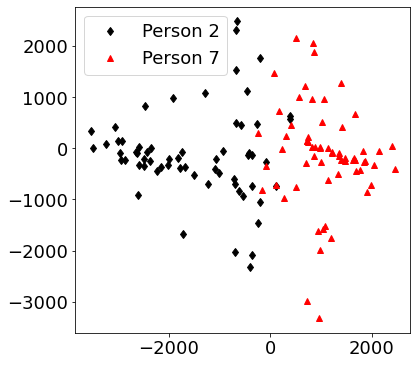

In [50]:
plt.figure(figsize=[6,6])
plt.plot(PCs_P1[:,pca_mode1],PCs_P1[:,pca_mode2],'d',color='k',label='Person '+str(P1num))
plt.plot(PCs_P2[:,pca_mode1],PCs_P2[:,pca_mode2],'^',color='r',label='Person '+str(P2num))

plt.legend()
plt.show()